In [49]:
#Initial Setup
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from time import process_time
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('dass_modeling.csv')
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,voted,married,familysize,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat
0,4,4,2,4,4,4,4,4,2,1,...,2,1,2,No Degree,27,3,34,4,40,4
1,4,1,2,3,4,4,3,4,3,2,...,2,1,4,No Degree,24,3,17,3,27,3
2,3,1,4,1,4,3,1,3,2,4,...,1,1,3,No Degree,39,4,12,2,17,1
3,2,3,2,1,3,3,4,2,3,3,...,2,1,5,Biology,16,2,17,3,16,1
4,2,2,3,4,4,2,4,4,4,3,...,2,1,4,Psychology,32,4,40,4,29,3


In [3]:
#df.drop('age_group',axis=1,inplace=True)

In [4]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,voted,married,familysize,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat
0,4,4,2,4,4,4,4,4,2,1,...,2,1,2,No Degree,27,3,34,4,40,4
1,4,1,2,3,4,4,3,4,3,2,...,2,1,4,No Degree,24,3,17,3,27,3
2,3,1,4,1,4,3,1,3,2,4,...,1,1,3,No Degree,39,4,12,2,17,1
3,2,3,2,1,3,3,4,2,3,3,...,2,1,5,Biology,16,2,17,3,16,1
4,2,2,3,4,4,2,4,4,4,3,...,2,1,4,Psychology,32,4,40,4,29,3


In [5]:
df.dtypes.value_counts()

int64     60
object     2
dtype: int64

In [6]:
df['country']=pd.factorize(df['country'], sort=True)[0]+1
df['major']=pd.factorize(df['major'], sort=True)[0]+1
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,voted,married,familysize,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat
0,4,4,2,4,4,4,4,4,2,1,...,2,1,2,46,27,3,34,4,40,4
1,4,1,2,3,4,4,3,4,3,2,...,2,1,4,46,24,3,17,3,27,3
2,3,1,4,1,4,3,1,3,2,4,...,1,1,3,46,39,4,12,2,17,1
3,2,3,2,1,3,3,4,2,3,3,...,2,1,5,10,16,2,17,3,16,1
4,2,2,3,4,4,2,4,4,4,3,...,2,1,4,56,32,4,40,4,29,3


In [7]:
df.dtypes.value_counts()

int64    62
dtype: int64

In [8]:
# Target variable will determine severe depression. Levels 3 or 4 indicates severe depression.  So 1 means the individual has 
# severe depression, while 0 means they do not.

bin_out=[]

for i in df['Depression_cat']:
    if i > 2:
        bin_out.append(1)
    else:
        bin_out.append(0)

df['Depression_cat_bin']=bin_out

df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat,Depression_cat_bin,Anxiety_cat_bin,Stress_cat_bin
0,4,4,2,4,4,4,4,4,2,1,...,46,27,3,34,4,40,4,1,1,1
1,4,1,2,3,4,4,3,4,3,2,...,46,24,3,17,3,27,3,1,1,1
2,3,1,4,1,4,3,1,3,2,4,...,46,39,4,12,2,17,1,1,0,0
3,2,3,2,1,3,3,4,2,3,3,...,10,16,2,17,3,16,1,0,1,0
4,2,2,3,4,4,2,4,4,4,3,...,56,32,4,40,4,29,3,1,1,1


In [9]:
df.drop(['Depression', 'Depression_cat', 'Anxiety', 'Anxiety_cat', 'Stress', 'Stress_cat'],axis=1,inplace=True)

In [10]:
df

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,religion,orientation,race,voted,married,familysize,major,Depression_cat_bin,Anxiety_cat_bin,Stress_cat_bin
0,4,4,2,4,4,4,4,4,2,1,...,12,1,10,2,1,2,46,1,1,1
1,4,1,2,3,4,4,3,4,3,2,...,7,0,70,2,1,4,46,1,1,1
2,3,1,4,1,4,3,1,3,2,4,...,4,3,60,1,1,3,46,1,0,0
3,2,3,2,1,3,3,4,2,3,3,...,4,5,70,2,1,5,10,0,1,0
4,2,2,3,4,4,2,4,4,4,3,...,10,1,10,2,1,4,56,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39732,2,1,3,2,3,2,1,3,1,4,...,2,4,60,2,1,2,46,1,0,0
39733,3,4,3,4,3,4,4,4,3,4,...,10,0,10,2,1,4,42,1,1,1
39734,2,1,2,1,1,1,1,1,2,1,...,7,1,30,1,2,3,32,0,0,0
39735,3,1,2,2,3,3,3,4,3,1,...,6,1,60,1,1,2,42,0,0,1


In [11]:
# Slice feature columns from dataframe for X
d_data = df.drop(['Anxiety_cat_bin', 'Stress_cat_bin'], axis=1)
d_data.rename(columns = {'Depression_cat_bin':'y'}, inplace = True)
d_data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,age,hand,religion,orientation,race,voted,married,familysize,major,y
0,4,4,2,4,4,4,4,4,2,1,...,16,1,12,1,10,2,1,2,46,1
1,4,1,2,3,4,4,3,4,3,2,...,16,2,7,0,70,2,1,4,46,1
2,3,1,4,1,4,3,1,3,2,4,...,17,1,4,3,60,1,1,3,46,1
3,2,3,2,1,3,3,4,2,3,3,...,13,2,4,5,70,2,1,5,10,0
4,2,2,3,4,4,2,4,4,4,3,...,19,3,10,1,10,2,1,4,56,1


Text(0, 0.5, 'PC2')

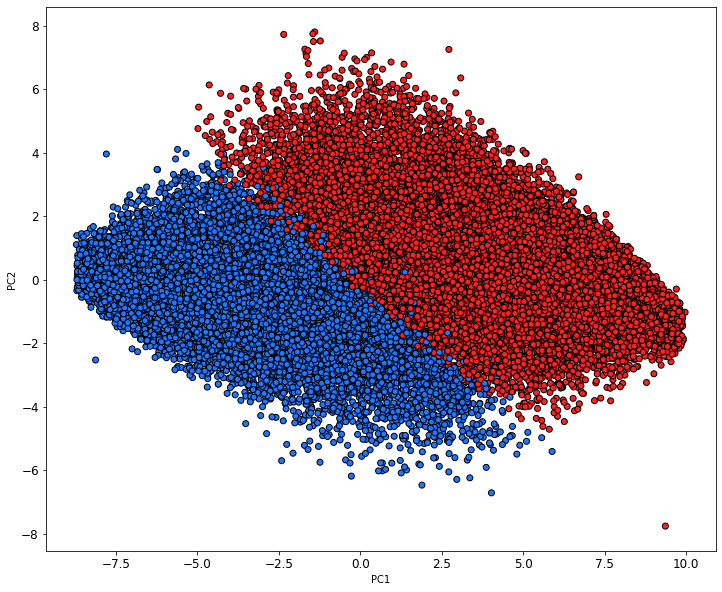

In [21]:
# PCA with only 2 Principal Components first, and visualization

#Scale the data
scaler = StandardScaler()
scaled=scaler.fit_transform(d_data)

#Obtain principal components
pca = PCA().fit_transform(scaled)

pc1 = pca[:,0]
pc2 = pca[:,1]

#Plot principal components
plt.figure(figsize=(12,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in d_data['y']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [23]:
#Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(d_data.drop('y',axis=1))
y = d_data['y'].values.reshape(-1,1)

# 95% of variance
pca = PCA(n_components = 0.95)
pca.fit(X)
reduced_ninety_five = pca.transform(X)
no_comp = reduced_ninety_five.shape[1]
no_comp

47

This shows that 47 components will capture 95% of the variance.

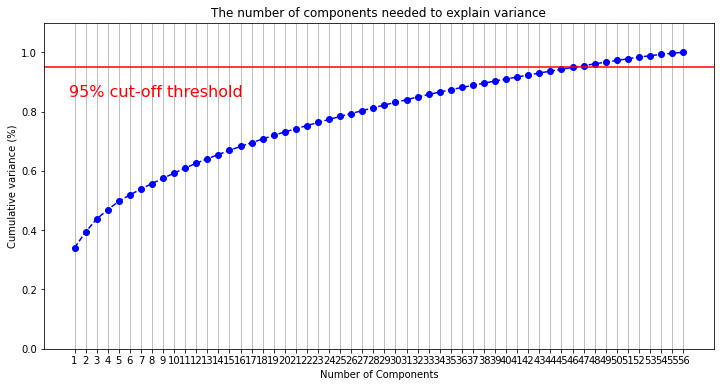

In [24]:
# Visualizing the PCA determination of number of components

pca = PCA().fit(X)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 57, step=1)
y_pca = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y_pca, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 57, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [28]:
# Perform PCA again with optimal number of principal components
pca = PCA(n_components = no_comp)
princompX = pca.fit_transform(X)

In [29]:
# Check balance of dataset
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 19698]
 [    1 20039]]


In [32]:
# Perform SMOTE on the dataset
resample=SMOTE(random_state=42)

X_res, y_res = resample.fit_resample(princompX,y)

In [33]:
unique, counts = np.unique(y_res1, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 20039]
 [    1 20039]]


In [34]:
# Create training and test sets to examine DEPRESSION
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [41]:
t1_start = process_time() 

clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

t1_stop = process_time()

print ('Processing time = ', t1_stop - t1_start)

Processing time =  1.609375


In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [45]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 1.0


In [46]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 1.0


In [53]:
scores = cross_val_score(clf, X_res, y_res, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [51]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[6026    0]
 [   0 5998]]


<AxesSubplot:>

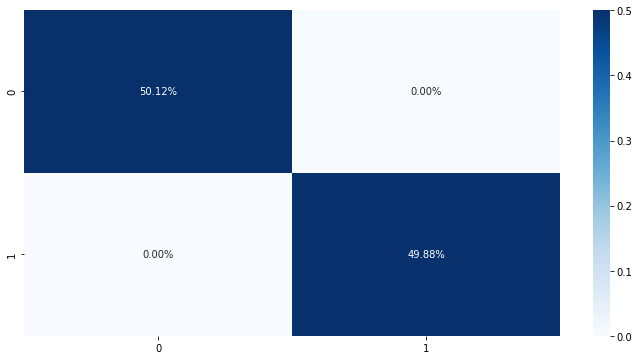

In [55]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')